<a href="https://colab.research.google.com/github/parvathy3333/etp_prediction/blob/main/etp_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


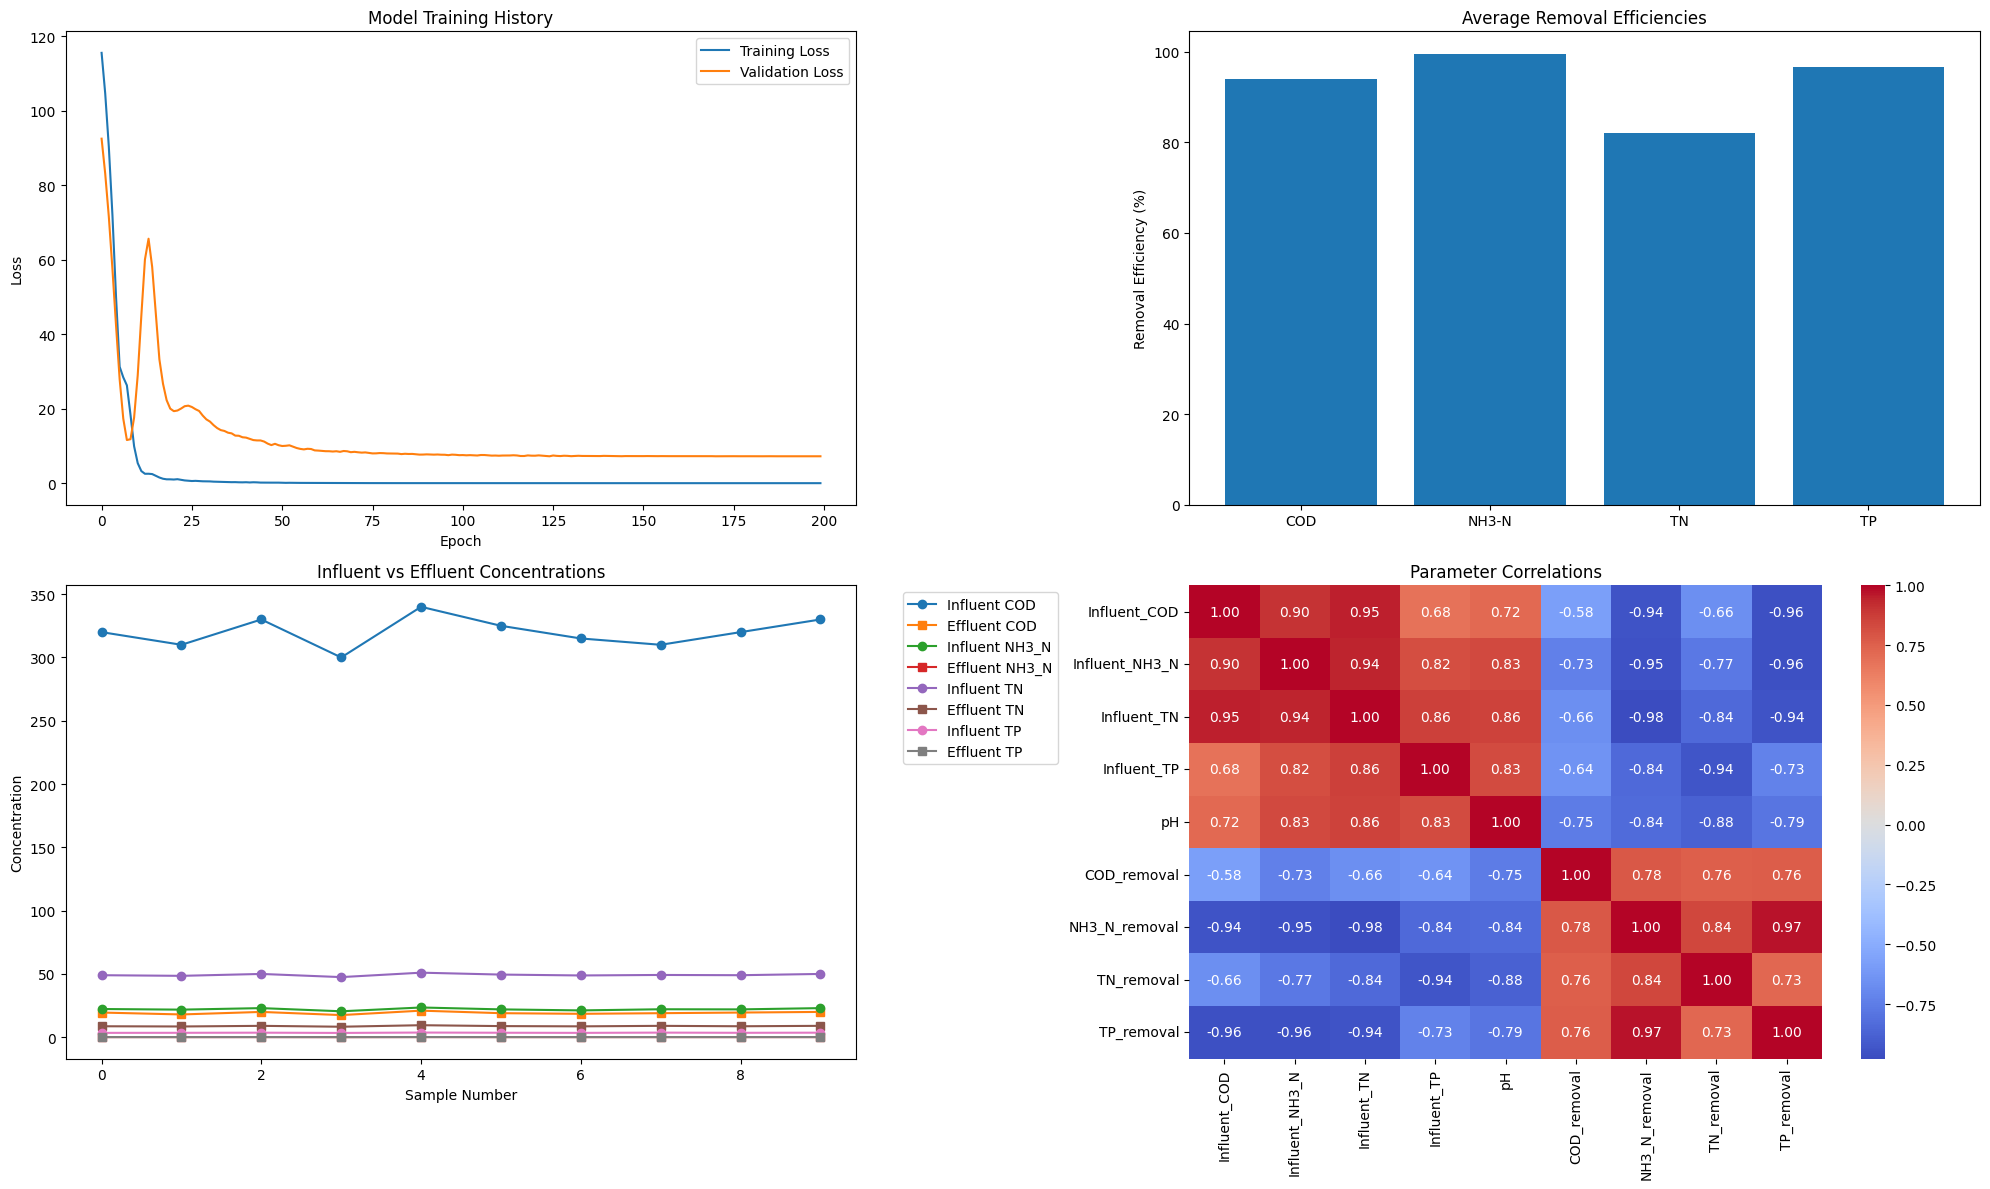


Model Performance Metrics:

Mean Squared Error for each parameter:
COD: 0.0496
NH3-N: 0.0021
TN: 0.1563
TP: 0.0074

Average Removal Efficiencies:
COD: 94.00%
NH3-N: 99.55%
TN: 82.13%
TP: 96.61%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Sample data generation
data = {
    'Influent_COD': [320, 310, 330, 300, 340, 325, 315, 310, 320, 330],
    'Influent_NH3_N': [22.3, 21.8, 23.0, 20.5, 23.5, 22.0, 21.2, 22.1, 22.0, 23.0],
    'Influent_TN': [49.0, 48.5, 50.0, 47.5, 51.0, 49.5, 48.8, 49.2, 49.0, 50.0],
    'Influent_TP': [3.45, 3.50, 3.60, 3.40, 3.70, 3.55, 3.45, 3.65, 3.50, 3.60],
    'pH': [7.7, 7.6, 7.8, 7.5, 7.9, 7.6, 7.7, 7.8, 7.6, 7.8],
    'Effluent_COD': [19.5, 18.0, 20.0, 17.5, 21.0, 19.0, 18.5, 19.0, 19.5, 20],
    'Effluent_NH3_N': [0.10, 0.09, 0.11, 0.08, 0.12, 0.10, 0.09, 0.10, 0.10, 0.11],
    'Effluent_TN': [8.67, 8.50, 9.00, 8.30, 9.50, 8.80, 8.60, 9.00, 8.67, 9.00],
    'Effluent_TP': [0.12, 0.11, 0.13, 0.10, 0.14, 0.12, 0.11, 0.12, 0.12, 0.13],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate removal efficiencies
df['COD_removal'] = ((df['Influent_COD'] - df['Effluent_COD']) / df['Influent_COD']) * 100
df['NH3_N_removal'] = ((df['Influent_NH3_N'] - df['Effluent_NH3_N']) / df['Influent_NH3_N']) * 100
df['TN_removal'] = ((df['Influent_TN'] - df['Effluent_TN']) / df['Influent_TN']) * 100
df['TP_removal'] = ((df['Influent_TP'] - df['Effluent_TP']) / df['Influent_TP']) * 100

# Features and target variables
X = df[['Influent_COD', 'Influent_NH3_N', 'Influent_TN', 'Influent_TP', 'pH']]
y = df[['Effluent_COD', 'Effluent_NH3_N', 'Effluent_TN', 'Effluent_TP']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=2,
                   validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Create visualizations
plt.figure(figsize=(20, 12))

# 1. Training Loss History
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2. Removal Efficiencies
plt.subplot(2, 2, 2)
removal_means = [df['COD_removal'].mean(), df['NH3_N_removal'].mean(),
                df['TN_removal'].mean(), df['TP_removal'].mean()]
plt.bar(['COD', 'NH3-N', 'TN', 'TP'], removal_means)
plt.title('Average Removal Efficiencies')
plt.ylabel('Removal Efficiency (%)')

# 3. Influent vs Effluent Concentrations
plt.subplot(2, 2, 3)
parameters = ['COD', 'NH3_N', 'TN', 'TP']
for param in parameters:
    plt.plot(df[f'Influent_{param}'], label=f'Influent {param}', marker='o')
    plt.plot(df[f'Effluent_{param}'], label=f'Effluent {param}', marker='s')
plt.title('Influent vs Effluent Concentrations')
plt.xlabel('Sample Number')
plt.ylabel('Concentration')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Correlation Heatmap
plt.subplot(2, 2, 4)
correlation = df[['Influent_COD', 'Influent_NH3_N', 'Influent_TN', 'Influent_TP',
                 'pH', 'COD_removal', 'NH3_N_removal', 'TN_removal', 'TP_removal']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Parameter Correlations')

plt.tight_layout()
plt.show()

# Print model performance metrics
print("\nModel Performance Metrics:")
mse = np.mean((y_test - y_pred) ** 2, axis=0)
print("\nMean Squared Error for each parameter:")
print(f"COD: {mse[0]:.4f}")
print(f"NH3-N: {mse[1]:.4f}")
print(f"TN: {mse[2]:.4f}")
print(f"TP: {mse[3]:.4f}")

# Calculate and print removal efficiencies
print("\nAverage Removal Efficiencies:")
print(f"COD: {df['COD_removal'].mean():.2f}%")
print(f"NH3-N: {df['NH3_N_removal'].mean():.2f}%")
print(f"TN: {df['TN_removal'].mean():.2f}%")
print(f"TP: {df['TP_removal'].mean():.2f}%")